### Importing packages & setting up data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


### Reading the dataset

In [6]:
wine = pd.read_csv(r'./winequality-white.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.04,45.0,170.0,1.00,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.05,14.0,132.0,0.99,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,1.00,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.06,47.0,186.0,1.00,3.19,0.40,9.9,6


### Adjusting the precision & understanding data

In [7]:
pd.set_option('precision', 2)
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.00,4898.00,4898.00,4898.00,4.90e+03,4898.00,4898.00,4.90e+03,4898.00,4898.00,4898.00,4898.00
mean,6.85,0.28,0.33,6.39,4.58e-02,35.31,138.36,9.94e-01,3.19,0.49,10.51,5.88
std,0.84,0.10,0.12,5.07,2.18e-02,17.01,42.50,2.99e-03,0.15,0.11,1.23,0.89
min,3.80,0.08,0.00,0.60,9.00e-03,2.00,9.00,9.87e-01,2.72,0.22,8.00,3.00
25%,6.30,0.21,0.27,1.70,3.60e-02,23.00,108.00,9.92e-01,3.09,0.41,9.50,5.00
50%,6.80,0.26,0.32,5.20,4.30e-02,34.00,134.00,9.94e-01,3.18,0.47,10.40,6.00
75%,7.30,0.32,0.39,9.90,5.00e-02,46.00,167.00,9.96e-01,3.28,0.55,11.40,6.00
max,14.20,1.10,1.66,65.80,3.46e-01,289.00,440.00,1.04e+00,3.82,1.08,14.20,9.00


### Visualizing the dataset

##### Please note that all features were plotted so that we could gain a better understanding of the dataset - in the interest that data can be unlabeled and this would be the first step in gaining a deeper understanding

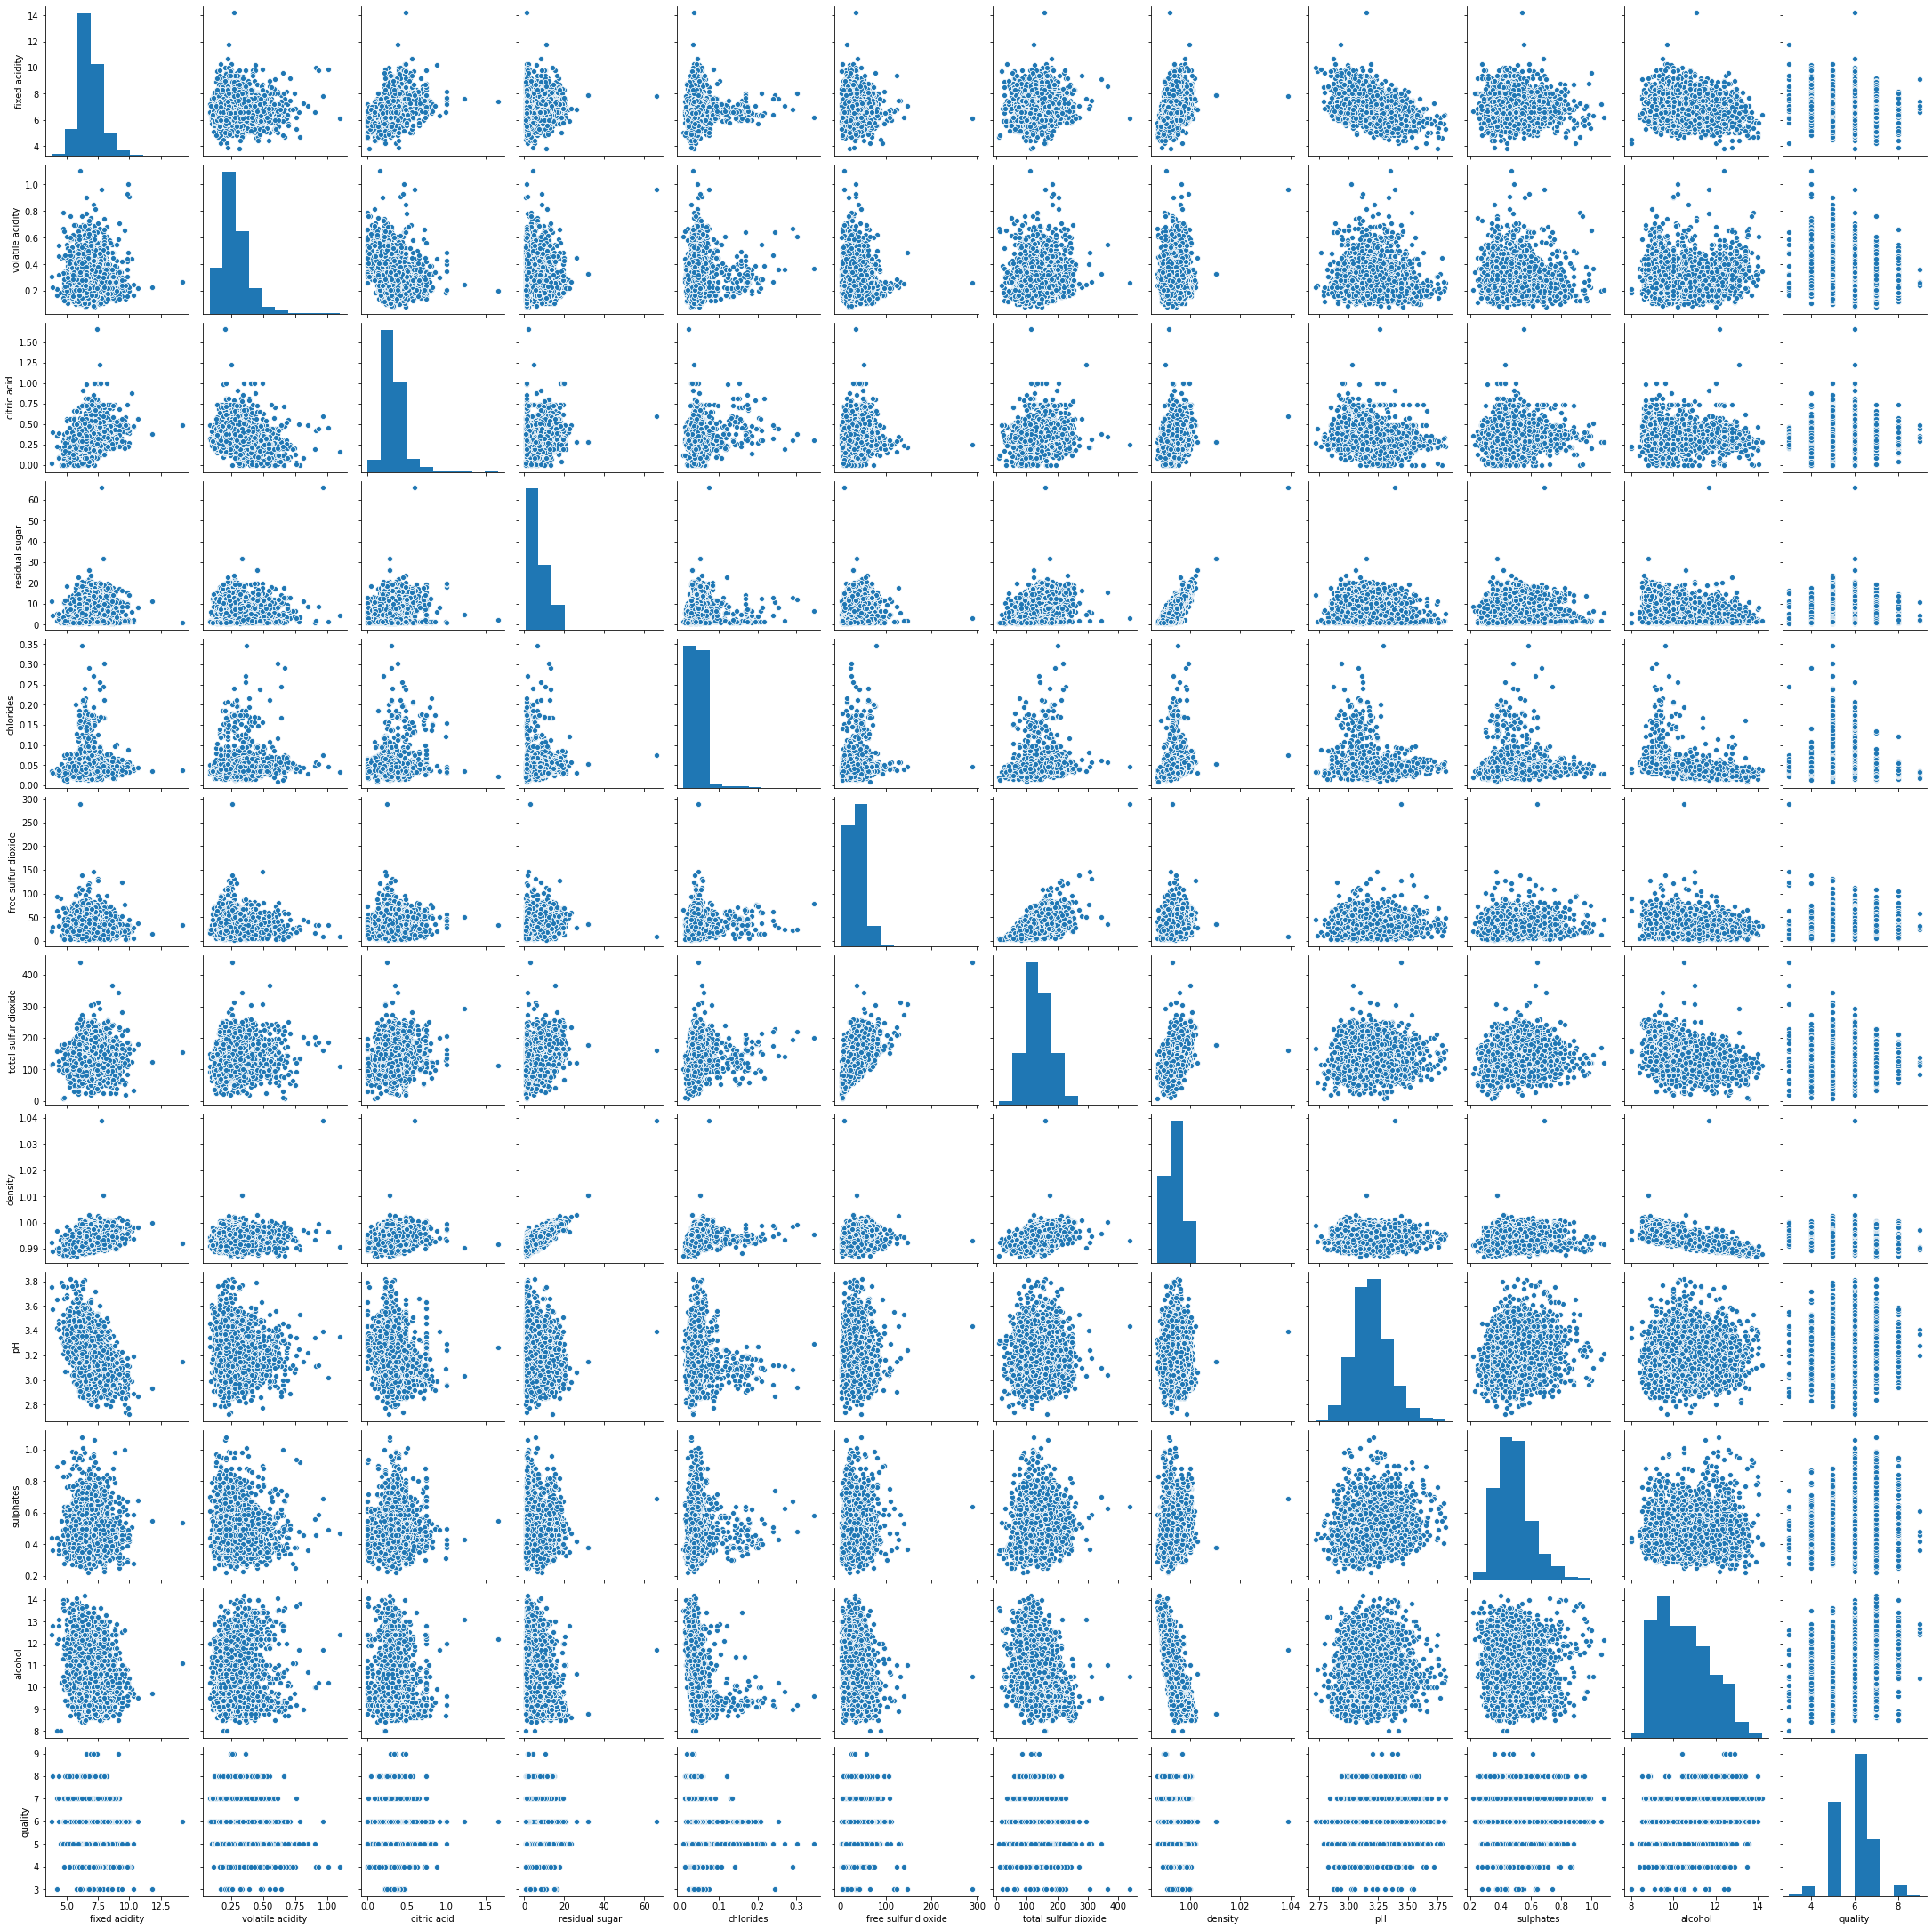

In [4]:
grid = sns.pairplot(data=wine, vars=wine)

### Dimension Reduction of the dataset using TSNE model

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=25)
reduced_wine = tsne.fit_transform(wine)

print(f'Reduced data shape: reduced_digits.shape = {reduced_wine.shape}')

Reduced data shape: reduced_digits.shape = (4898, 2)


### Plotting reduced data (TSNE Model)

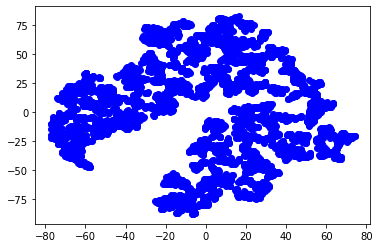

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

dots = plt.scatter(reduced_wine[:, 0], reduced_wine[:, 1], c='blue')


### K-Means estimator

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=25)  
kmeans.fit(wine)


KMeans(n_clusters=2, random_state=25)

### Determining centroids for n-clusters

In [11]:
kmeans.cluster_centers_

array([[6.78481984e+00, 2.73151980e-01, 3.21651802e-01, 4.79875134e+00,
        4.21790938e-02, 2.72060293e+01, 1.08652694e+02, 9.92779781e-01,
        3.18878345e+00, 4.79272208e-01, 1.09615400e+01, 6.00998930e+00],
       [6.94840095e+00, 2.85050119e-01, 3.50968974e-01, 8.52231504e+00,
        5.05799523e-02, 4.61482100e+01, 1.78108353e+02, 9.95696594e-01,
        3.18757518e+00, 5.03995227e-01, 9.91583930e+00, 5.70119332e+00]])

In [12]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

### Reducing data using PCA Model

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=25)  # reduce to two components
pca.fit(wine)

PCA(n_components=2, random_state=25)

In [16]:
reduced_wine_pca = pca.transform(wine)
reduced_wine_pca.shape

(4898, 2)

### Plotting the reduced data PCA

In [18]:
reduced_wine_df = pd.DataFrame(reduced_wine_pca, 
                               columns=['Component 1', 'Component 2'])
reduced_wine_df['alcohol'] = wine.alcohol

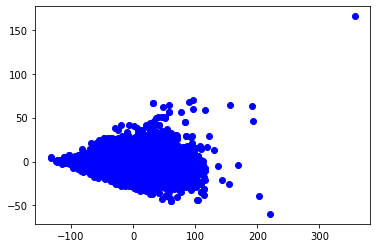

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

dots1 = plt.scatter(reduced_wine_pca[:, 0], reduced_wine_pca[:, 1], c='blue')

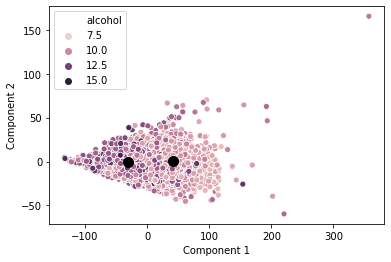

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


axes = sns.scatterplot(data=reduced_wine_df, hue='alcohol', legend='brief', 
                       x='Component 1', y='Component 2') 

wine_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wine_centers[:,0], wine_centers[:,1], s=100, c='k')

As part of unsupervised M/L analysis, we sought to use TSNE, PCA methods of decomposition and then used K-Means Clustering to analyse how the alcohol percentage in wine clusters with respect to the data in consideration.

## Supervised M/L

### K-Nearest Neighbours
### Split the data for training and testing

In [21]:
wine.quality

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64

### Setting up training & test data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     wine, wine.quality, random_state=500)

print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape  = {X_test.shape}')

print()
print(f'y_train.shape = {y_train.shape}')
print(f'y_test.shape  = {y_test.shape}')

X_train.shape = (3673, 12)
X_test.shape  = (1225, 12)

y_train.shape = (3673,)
y_test.shape  = (1225,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

### Testing the model by predicting wine quality 

In [28]:
predicted = knn.predict(X=X_test)
expected = y_test

print('First twenty predictions:')
print(f'predicted[:05] = {predicted[:5]}')
print(f' expected[:05] = {expected[:5]}')

First twenty predictions:
predicted[:05] = [6 5 7 5 6]
 expected[:05] = 2435    4
2282    5
3737    5
998     6
34      5
Name: quality, dtype: int64


In [29]:
wrong = [ (pred, exp) 
          for (pred, exp) in zip(predicted, expected) 
          if pred != exp
        ]

print('Wrong predictions:')
print(wrong)

Wrong predictions:
[(6, 4), (7, 5), (5, 6), (6, 5), (5, 6), (6, 7), (5, 6), (6, 5), (6, 8), (6, 7), (6, 7), (5, 6), (6, 7), (7, 6), (6, 5), (7, 5), (6, 7), (5, 7), (6, 5), (6, 8), (5, 4), (5, 6), (5, 6), (4, 5), (7, 6), (6, 7), (6, 5), (6, 7), (6, 7), (7, 6), (6, 7), (5, 8), (6, 5), (5, 6), (5, 6), (5, 7), (5, 6), (5, 6), (5, 7), (4, 5), (7, 6), (5, 7), (5, 6), (6, 7), (6, 5), (6, 7), (5, 8), (5, 7), (7, 8), (7, 5), (6, 5), (6, 5), (5, 6), (5, 6), (6, 8), (5, 6), (5, 7), (5, 6), (7, 6), (6, 5), (6, 5), (7, 5), (6, 8), (5, 6), (5, 7), (6, 8), (3, 5), (6, 5), (6, 7), (5, 6), (5, 6), (6, 5), (7, 5), (5, 6), (6, 4), (5, 7), (6, 5), (6, 8), (6, 5), (6, 5), (5, 6), (5, 7), (5, 6), (5, 6), (6, 7), (5, 7), (5, 7), (6, 5), (6, 7), (6, 7), (6, 5), (5, 6), (6, 5), (5, 6), (6, 7), (7, 5), (6, 7), (5, 7), (6, 5), (6, 7), (5, 6), (5, 7), (5, 6), (5, 6), (5, 6), (6, 5), (5, 6), (6, 7), (5, 6), (5, 6), (6, 5), (6, 5), (7, 5), (6, 7), (5, 6), (6, 7), (5, 4), (6, 5), (6, 8), (6, 7), (5, 7), (5, 6), (5, 

In [30]:
print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

Prediction accuracy score = 48.82%


### Confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

print('Confusion matrix:')
print(confusion)

Confusion matrix:
[[  0   0   4   2   0   0]
 [  1   6  22   9   0   0]
 [  2   9 225 119  15   0]
 [  0   6 190 298  45   1]
 [  0   1  33 118  66   4]
 [  0   0   3  24  19   3]]


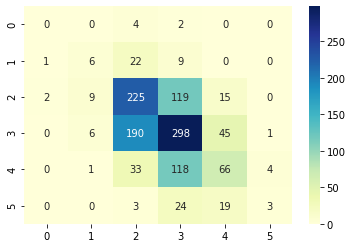

In [32]:
import pandas as pd
import seaborn as sns

confusion_df = pd.DataFrame(confusion, index=range(6), columns=range(6))
axes = sns.heatmap(confusion_df, annot=True, fmt="d",cmap='YlGnBu')



### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(expected, predicted))

As part of supervised M/L analysis, we sought out to use k-nearest neighbour algorithm to predict the quality. For this we first trained and tested the data as a first step. Then we applied the data from first step to the k-nearest neighbour where had used the n-neighbour as 4 for our analysis(based on different iterations ranging from 2 to 11) and then tested the model to predict and then compared it with expected data. Based on the results from the above steps we then determined the confusion matrix and classification report.

### Other Experiment on PH levels in wines

In [ ]:
reduced_wine_df = pd.DataFrame(reduced_wine_pca, 
                               columns=['Component 1', 'Component 2'])
reduced_wine_df['pH'] = wine.pH


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


axes = sns.scatterplot(data=reduced_wine_df, hue='pH', 
                       x='Component 1', y='Component 2') 

wine_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(wine_centers[:,0], wine_centers[:,1], s=100, c='k')

As part of the additional analysis, we sought to find out if/how pH levels are spreadout from the given dataset and as part of this data analysis we find that PH levels are consistent with other parameters like(alcohol percentages and Quality) which we had carried out initially.